In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import random
import math


from math import e
from sklearn import datasets
from sklearn import model_selection
from mpl_toolkits import mplot3d
from mlxtend.evaluate import bias_variance_decomp

In [2]:
def step_func(z):
    return 1.0 if (z > 0) else 0.0
def sigmoid_func(z):
    return (1/(1+e**-z))

In [3]:
class Perceptron():
    def __init__(self, X, lr, y, seed=0):
        random.seed(0)
        self.X = X
        self.y = y
        self.lr = lr
        m,n = X.shape
        self.weights = np.ones((n)).reshape(n,1)
        for i, w in enumerate(self.weights):
            self.weights[i] *= random.randrange(-1000,1000,1)/1000
        return
        
    def update_weights(self, epochs=1):
        for epoch in range(epochs):
            for idx, x_i in enumerate(self.X):
                x_i.reshape(-1,1)
                y_hat = step_func(np.dot(x_i.T,self.weights))                
                self.weights += self.lr*((self.y[idx]-y_hat)*x_i).reshape(4,1)
        return
    
    def plot(self, contour=True):
        
        fig = plt.figure(figsize=plt.figaspect(0.5))
        ax1 = fig.add_subplot(1, 2, 1, projection='3d')
        ax2 = fig.add_subplot(1, 2, 2, projection='3d')
        ax1.set_title('Target Values, Perceptron Training Rule')
        ax2.set_title('Training Values, Perceptron Training Rule')
        ax1.set_xlabel('X1')
        ax1.set_ylabel('X2')
        ax1.set_zlabel('X3')
        ax2.set_xlabel('X1')
        ax2.set_ylabel('X2')
        ax2.set_zlabel('X3')
        
        for idy, y_i in enumerate(self.y):
            if y_i == 0:
                ax1.scatter(self.X[idy][1], self.X[idy][2], self.X[idy][3], color='red')
            else:
                ax1.scatter(self.X[idy][1], self.X[idy][2], self.X[idy][3], color='blue')
        
        y_hat = np.zeros(self.X.shape[0])
        for idx, x_i in enumerate(self.X):
            y_hat[idx] = step_func(np.dot(x_i.T, self.weights))
        
        for idy, y_i in enumerate(y_hat):
            if y_i == 0:
                ax2.scatter(self.X[idy][1], self.X[idy][2], self.X[idy][3], color='red')
            else:
                ax2.scatter(self.X[idy][1], self.X[idy][2], self.X[idy][3], color='blue')
        
        if contour:
            xx, yy = np.meshgrid(np.linspace(-10, 10, 20), np.linspace(-10, 10, 20))
            zz = ((self.weights[1]*xx + self.weights[2]*yy + self.weights[0]))/self.weights[3]
            ax2.plot_surface(xx, yy, zz, color='yellow')         
        return ax1, ax2        
    
class Adaline():
    def __init__(self, X, lr, y, seed=0):
        random.seed(0)
        self.X = X
        self.y = y
        self.lr = lr
        m,n = X.shape
        self.weights = np.random.rand((n)).reshape(n, 1)
        
    def update_weights(self, epochs=1):
        for epoch in range(epochs):
            for idx, x_i in enumerate(self.X):
                x_i.reshape(-1,1)
                s = sigmoid_func(np.dot(x_i.T,self.weights))
                y_hat = np.dot(x_i.T,self.weights)
                self.weights += (self.lr*(self.y[idx]-s)*(np.square(s)*np.exp(-1*y_hat))*x_i).reshape(4,1)
        return
        
    def plot(self, contour=True):
        
        fig = plt.figure(figsize=plt.figaspect(0.5))
        ax1 = fig.add_subplot(1, 2, 1, projection='3d')
        ax2 = fig.add_subplot(1, 2, 2, projection='3d')
        
        ax1.set_title('Target Values, Adaline Training Rule')
        ax2.set_title('Training Values, Adaline Training Rule')
        
        ax1.set_xlabel('X1')
        ax1.set_ylabel('X2')
        ax1.set_zlabel('X3')
        
        ax2.set_xlabel('X1')
        ax2.set_ylabel('X2')
        ax2.set_zlabel('X3')
        
        for idy, y_i in enumerate(self.y):
            if y_i == 0:
                ax1.scatter(self.X[idy][1], self.X[idy][2], self.X[idy][3], color='red')
            else:
                ax1.scatter(self.X[idy][1], self.X[idy][2], self.X[idy][3], color='blue')
        
        y_hat = np.zeros(self.X.shape[0])
        for idx, x_i in enumerate(self.X):
            y_hat[idx] = step_func(np.dot(x_i.T, self.weights))
        
        
        for idy, y_i in enumerate(y_hat):
            if y_i == 0:
                ax2.scatter(self.X[idy][1], self.X[idy][2], self.X[idy][3], color='red')
            else:
                ax2.scatter(self.X[idy][1], self.X[idy][2], self.X[idy][3], color='blue')
        
        if contour:
            xx, yy = np.meshgrid(np.linspace(-5, 5, 10), np.linspace(-5, 5, 10))
            zz = ((self.weights[1]*xx + self.weights[2]*yy + self.weights[0]))/self.weights[3]
            ax2.plot_surface(xx, yy, zz, color='yellow')
        return ax1, ax2

# Question 1c

(<Axes3DSubplot:title={'center':'Target Values, Adaline Training Rule'}, xlabel='X1', ylabel='X2'>,
 <Axes3DSubplot:title={'center':'Training Values, Adaline Training Rule'}, xlabel='X1', ylabel='X2'>)

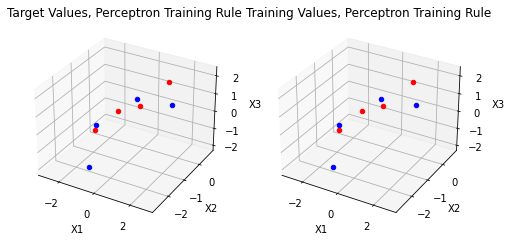

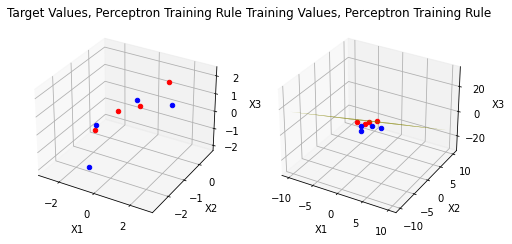

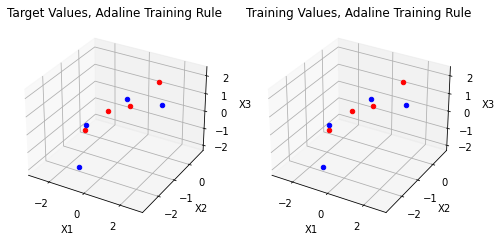

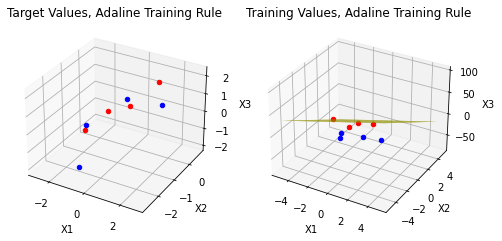

In [4]:
X =  np.array(([-1,0.8,0.7,1.2], [-1,-0.8,-0.7,0.2], [-1,-0.5,0.3,-0.2],
     [-1,-2.8,-0.1,-2], [-1,1.2,-1.7,2.2], [-1,-0.8,-2,0.5],
     [-1,-0.5,-2.7,-1.2],[-1,2.8,-1.4,2.1]))
y = np.array((0,0,0,0,1,1,1,1))

lr = 0.5
epochs=2000


percept = Perceptron(X, lr, y)
percept.update_weights(epochs=epochs)
percept.plot(contour=False)
percept.plot(contour=True)



ad = Adaline(X, lr, y)
ad.update_weights(epochs=epochs)
ad.plot(contour=False)
ad.plot(contour=True)


# Question 1d

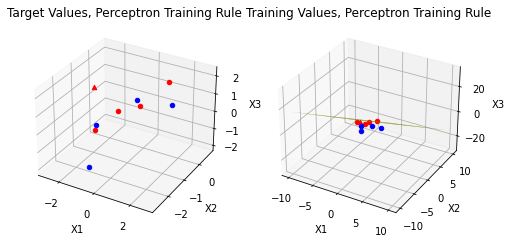

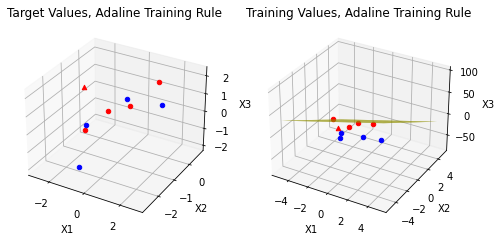

In [5]:
X_new = np.array((-1.4, -1.5, 2))
y_new = 0

ax1, ax2 = percept.plot(contour=True)
if y_new == 0:
    ax1.scatter(X_new[0],X_new[1], X_new[2], c='red', marker='^')
    ax2.scatter(X_new[0],X_new[1], X_new[2], c='red', marker='^')
else:
    ax1.scatter(X_new[0],X_new[1], X_new[2], c='b;ue', marker='^')
    ax2.scatter(X_new[0],X_new[1], X_new[2], c='b;ue', marker='^')
    
ax1, ax2 = ad.plot(contour=True)
if y_new == 0:
    ax1.scatter(X_new[0],X_new[1], X_new[2], c='red', marker='^')
    ax2.scatter(X_new[0],X_new[1], X_new[2], c='red', marker='^')
else:
    ax1.scatter(X_new[0],X_new[1], X_new[2], c='b;ue', marker='^')
    ax2.scatter(X_new[0],X_new[1], X_new[2], c='b;ue', marker='^')
    

# Question 2

In [6]:
def sigmoid_derivative(z):
    return sigmoid_func(z) * (1 - sigmoid_func(z))

In [7]:
class Madaline():
    def __init__(self, x, y):
        self.X=x #Input layer
        self.y=y #Desired outpupt
        self.yh=np.zeros((1, self.y.shape[0])) #Ouput of network
        
        self.L=2 #number of layers of network
        self.dims = [2, 2, 1] #number of neurons in each layer, 2 features, 10 hidden layer, 1 output
        
        self.param={} #will hold W and b paramters of each layer
        self.ch={} #hold intermediate calculations for backward pass of gradient descent
        self.grad={}
        
        self.lr=0.1 #learning rate
        
    def nInit(self):
        np.random.seed(1)
        #Create random weights for layer 1
        self.param['W1'] = np.random.randn(self.dims[1], self.dims[0])/np.sqrt(self.dims[0]) #weight 1
        #create 0 bias for layer 1
        self.param['b1'] = np.zeros((self.dims[1], 1)) #bias 1
        #create random weights for layer 2
        self.param['W2'] = np.random.randn(self.dims[2], self.dims[1])/np.sqrt(self.dims[1]) #weight 2
        #creat random bias for layer 2
        self.param['b2'] = np.zeros((self.dims[2], 1)) #bias 2
        return

    def plot_target(self):
        plt.figure()
        plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='RdBu', vmin =- 0.2, vmax = 1.2,edgecolor="white", linewidth=1)
        return
    
    def feedforward (self):
        #multiply input and weights, add bias to get z1
        Z1 = self.param['W1'].dot(self.X.T) + self.param['b1']
        
        #apply sigmoid function
        A1 = sigmoid_func(np.array(Z1))
        self.ch['Z1'],self.ch['A1']=Z1, A1
        
        #multiple output from first layer and weights, add bias to get z2
        Z2 = self.param['W2'].dot(A1) + self.param['b2']
        
        #apply sigmoid function
        A2 = sigmoid_func(Z2)
        self.ch['Z2'],self.ch['A2']=Z2, A2
        
        self.yh=A2
        return self.yh
    
    def gd(self, epochs=10):
        np.random.seed(1)
        for i in range(0, epochs):
            Yh=self.feedforward()
            self.backwards()
        return
        
    def backwards(self):
        dLoss_Yh = -(self.y.T-self.yh)
        dLoss_Z2 = dLoss_Yh*sigmoid_derivative(self.ch['Z2'])
        dLoss_A1 = np.dot(self.param["W2"].T,dLoss_Z2)
        dLoss_W2 = 1./self.ch['A1'].shape[1]*np.dot(dLoss_Z2,self.ch['A1'].T)
        dLoss_b2 = 1./self.ch['A1'].shape[1]*np.dot(dLoss_Z2,np.ones([dLoss_Z2.shape[1],1]))
        
        dLoss_Z1 = dLoss_A1*sigmoid_derivative(self.ch['Z1'])
        dLoss_A0 = np.dot(self.param["W1"].T,dLoss_Z1)
        dLoss_W1 = 1./self.X.shape[1]*np.dot(dLoss_Z1,self.X)
        dLoss_b1 = 1./self.X.shape[1]*np.dot(dLoss_Z1, np.ones([dLoss_Z1.shape[1],1]))
        
        self.param['W1'] = self.param['W1'] - self.lr*dLoss_W1
        self.param['b1'] = self.param['b1'] - self.lr*dLoss_b1
        self.param['W2'] = self.param['W2'] - self.lr*dLoss_W2
        self.param['b2'] = self.param['b2'] - self.lr*dLoss_b2
        return
    
    def plot(self, contour=True):        
        f, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
        ax1.set_title(f"Target Values, Madaline")
        ax1.set_xlabel("x0")
        ax1.set_ylabel('x1')
        
        ax1.scatter(X[:,0], X[:,1], c=y, s=50, cmap='RdBu', vmin =- 0.2, vmax = 1.2,edgecolor="white", linewidth=1)
            
        ax2.set_title(f"Network Values, Madaline")
        ax2.set_xlabel("x0")
        ax2.set_ylabel('x1')
                
        z1 = self.param['W1'].dot(self.X.T) + self.param['b1']
        A1 = sigmoid_func(np.array(z1))
        z2 = self.param['W2'].dot(A1) + self.param['b2']
        yh = sigmoid_func(z2)
        y_hat = np.round_(yh)[0]
        
        if contour:
            xx, yy = np.mgrid[-0.1:1.1:0.1, -0.1:1.1:0.1]
            
            z1 = np.dot((self.param['W1']), np.c_[xx.ravel(), yy.ravel()].T)+ self.param['b1']
            A1 = sigmoid_func(np.array(z1))
            z2 = self.param['W2'].dot(A1) + self.param['b2']
            zz = sigmoid_func(z2)
            zz = np.round_(zz)
            zz = zz.reshape(xx.shape)  
            
            ax2.contourf(xx, yy, zz)
        
        for idy, y_i in enumerate(y_hat):
            if y_i == 0:
                ax2.scatter(self.X[idy,0], self.X[idy,1], c='red', s=50, vmin =- 0.2, vmax = 1.2,edgecolor="white", linewidth=1)
            else:
                ax2.scatter(self.X[idy,0], self.X[idy,1], c='blue', s=50, vmin =- 0.2, vmax = 1.2,edgecolor="white", linewidth=1)
        
        return
    
    

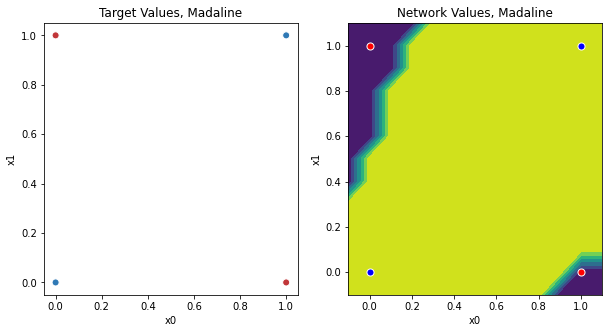

In [8]:
X =  np.array(([0,0],[0,1],[1,0],[1,1]))
y = np.array((1,0,0,1))

epochs = 3000

# Madaline learning
madaline = Madaline(X, y)
madaline.nInit()
madaline.gd(epochs=epochs)
madaline.plot()

# Question 3

In [9]:
def get_data(M_i):
    # generating the data used in the function
    x1 = np.ones(M_i)
    for i in range(len(x1)):
        x1[i] *= (random.randrange(-1000, 1000, 1))/1000
        
    f1 = x1*np.sin(6*np.pi*x1)*np.exp(-1*np.square(x1))
    
    x2 = np.ones(M_i)
    for i in range(len(x2)):
        x2[i] *= (random.randrange(-2000, 2000, 1))/1000
    
    f2 = np.exp(-1*np.square(x2))*np.arctan(x2)*np.sin(4*np.pi*x2)
    
    return x1, x2, f1, f2

def f1 (x1):
    return x1*np.sin(6*np.pi*x1)*np.exp(-1*np.square(x1))

def f2 (x2):
    return np.exp(-1*np.square(x2))*np.arctan(x2)*np.sin(4*np.pi*x2)

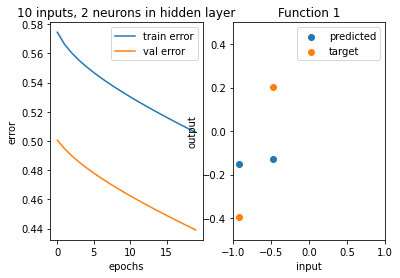

testing error is 0.3949099682155065


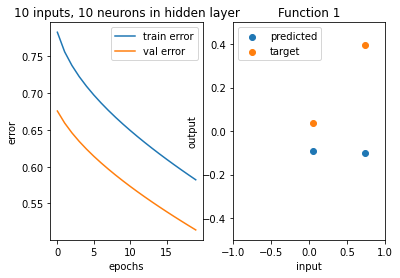

testing error is 0.685863898228854


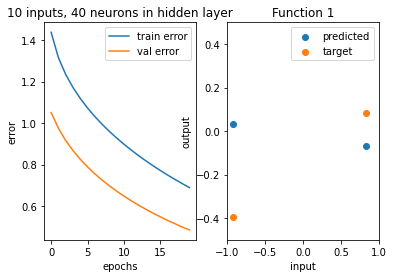

testing error is 0.6901332096094848


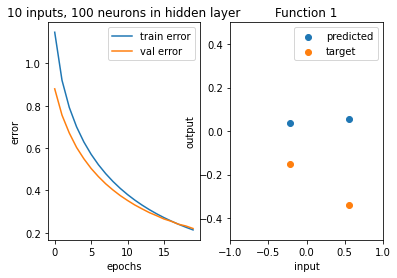

testing error is 0.15728635838022456


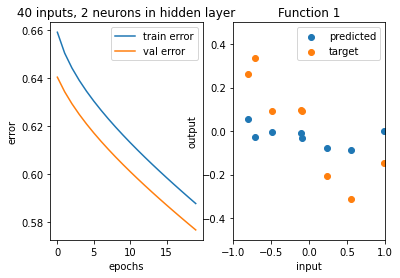

testing error is 0.5586340160109102


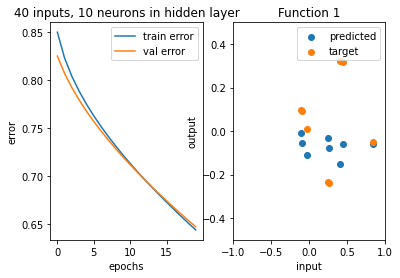

testing error is 0.6193862323067151


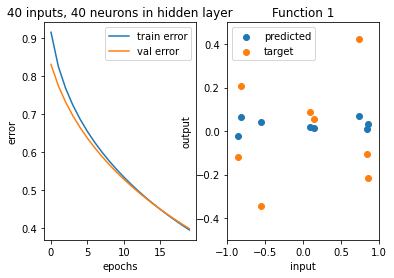

testing error is 0.4143612209474668


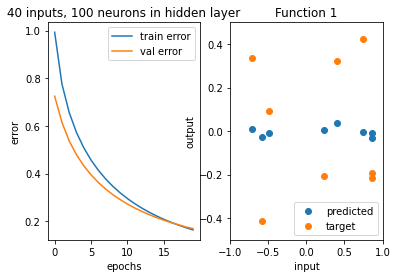

testing error is 0.18822444553952664


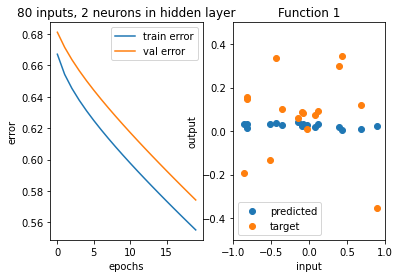

testing error is 0.5489927180460654


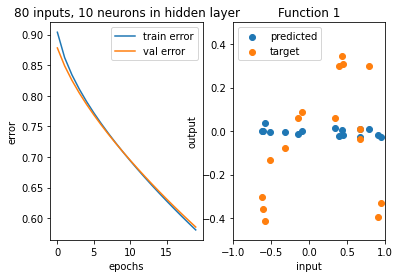

testing error is 0.5738795536919497


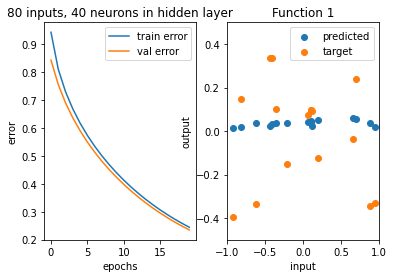

testing error is 0.25430557393701747


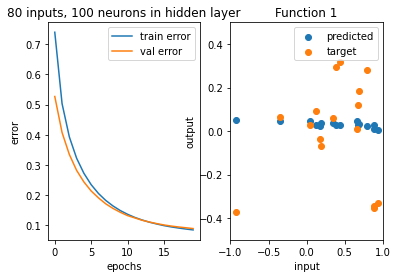

testing error is 0.08623312252457253


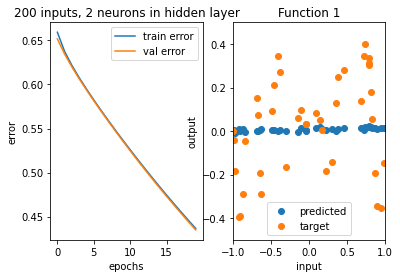

testing error is 0.4241687596775591


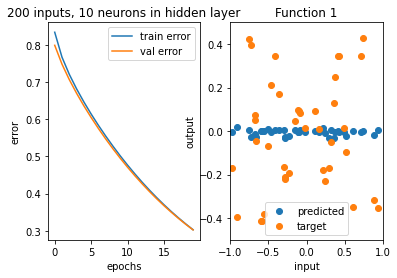

testing error is 0.2945378855103627


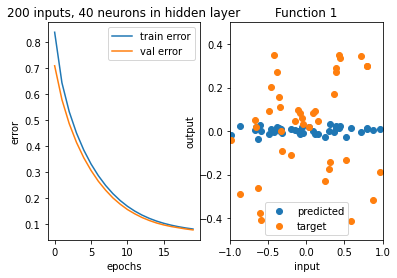

testing error is 0.07691225138492883


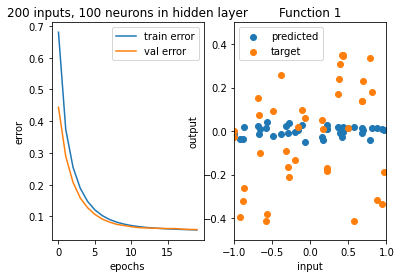

testing error is 0.06032955557107925


In [10]:
#For function 1
M_i = [10, 40, 80, 200]
M_j = [2, 10, 40, 100]
epochs = 20

for i in M_i:
    X1, X2, y1, y2 = get_data(i)
    
    for j in M_j:
        # defining how many splits will be made for the data and variable set up
        splits = int(round(i*0.8))
        train_errors = np.zeros((5*splits,epochs))
        val_errors = np.zeros((5*splits,epochs))
        test_errors = np.zeros((5*splits))
        predicted_values = np.zeros((5*splits, int(round(i*0.2))))

        index=0
        for run in range(0,5):
            
            X, X_test, y, y_test = model_selection.train_test_split(X1, y1, test_size=0.20, shuffle=True)
            
            # initializing the KFold for data
            kf = model_selection.KFold(n_splits=splits, shuffle=True)
            
            # training the model with training data
            for train_index, val_index in kf.split(X):
                model = tf.keras.models.Sequential([
                    tf.keras.layers.Dense(j, activation='sigmoid', 
                      kernel_initializer=keras.initializers.RandomNormal(stddev=10), 
                      bias_initializer=keras.initializers.RandomNormal(stddev=10), input_shape=(1,)),
                    tf.keras.layers.Dense(1)
                ])
                
                # compiling the model and defining the loss function and metric to track
                model.compile(loss=tf.keras.losses.MeanSquaredError(),metrics=['accuracy'])
                X_train, X_val = X[train_index], X[val_index]
                y_train, y_val = y[train_index], y[val_index]

                # fitting the model using the training data and validation data
                model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), verbose=0)
                
                # receiving the training error and test error
                train_errors[index] = model.history.history['loss']
                val_errors[index] = model.history.history['val_loss']
                test_errors[index] = model.evaluate(X_test, y_test, verbose=0)[0]
                predicted_values[index] = model.predict(X_test).reshape(-1)
                
                index +=1

            
        # plotting the values found in the model training and testing
        predicted_value = np.zeros(len(X_test))
        for idx in range(len(X_test)):
            predicted_value[idx] = np.mean(predicted_values[:,idx])
        test_error = np.mean(test_errors)
        val_error = np.zeros(epochs)
        train_error = np.zeros(epochs)
        for epoch in range (epochs):
            val_error[epoch] = np.mean(val_errors[:,epoch])
            train_error[epoch] = np.mean(train_errors[:,epoch])
        fig, (ax1, ax2) = plt.subplots(1,2)
        ax1.set_title(f'{i} inputs, {j} neurons in hidden layer')
        ax1.set_xlabel('epochs')
        ax1.set_ylabel('error')
        ax1.plot(np.arange(0,epochs,1), train_error, label='train error')
        ax1.plot(np.arange(0,epochs,1), val_error, label='val error')
        ax1.legend()
        ax2.set_title('Function 1')
        ax2.set_xlabel('input')
        ax2.set_ylabel('output')
        ax2.set_xlim(-1,1)
        ax2.set_ylim(-0.5, 0.5)
        ax2.scatter(X_test, predicted_value, label='predicted')
        ax2.scatter(X_test, f1(X_test), label='target')
        ax2.legend()
        plt.show()
        print(f'testing error is {test_error}')


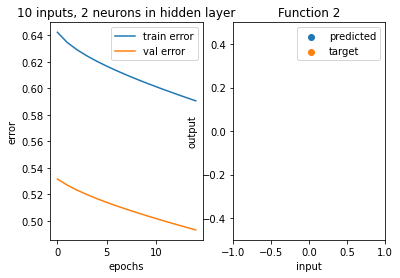

testing error is 0.5484607380931266


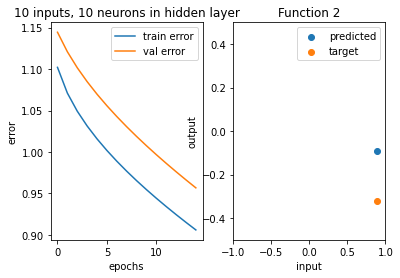

testing error is 0.7544711208203807


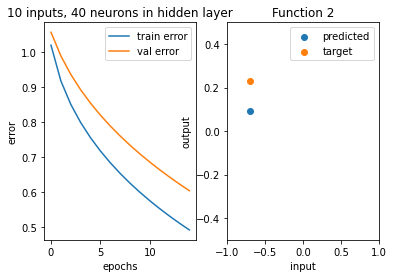

testing error is 0.5564475427789148


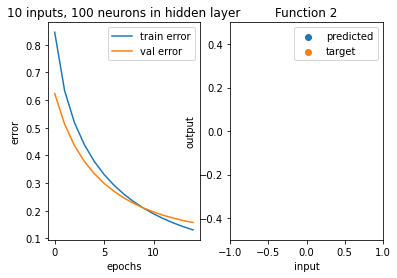

testing error is 0.1899385643657297


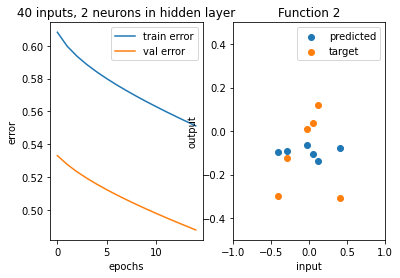

testing error is 0.5407506103278138


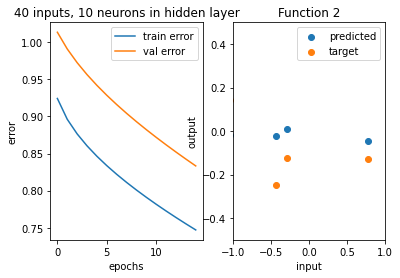

testing error is 0.7465152463759296


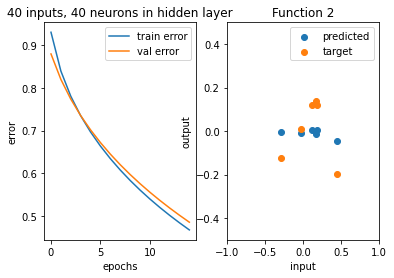

testing error is 0.46078859402332456


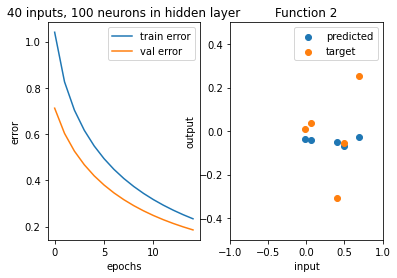

testing error is 0.2218358775920933


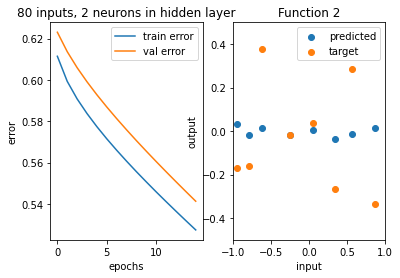

testing error is 0.5240049834013917


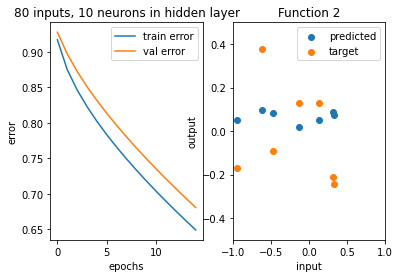

testing error is 0.6301248771720566


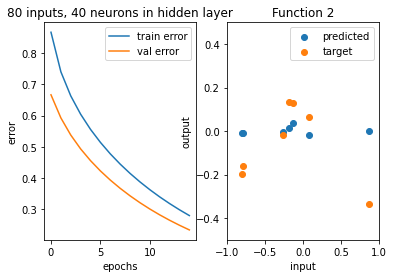

testing error is 0.2639032855950063


In [ ]:
#For function 2
M_i = [10, 40, 80, 200]
M_j = [2, 10, 40, 100]
epochs = 15

for i in M_i:
    X1, X2, y1, y2 = get_data(i)
    
    for j in M_j:
        # defining how many splits will be made for the data and variable set up
        splits = int(round(i*0.8))
        train_errors = np.zeros((5*splits,epochs))
        val_errors = np.zeros((5*splits,epochs))
        test_errors = np.zeros((5*splits))
        predicted_values = np.zeros((5*splits, int(round(i*0.2))))

        index=0
        for run in range(0,5):
            
            X, X_test, y, y_test = model_selection.train_test_split(X2, y2, test_size=0.20, shuffle=True)
            
            # initializing the KFold for data
            kf = model_selection.KFold(n_splits=splits, shuffle=True)
            
            # training the model with training data
            for train_index, val_index in kf.split(X):
                model = tf.keras.models.Sequential([
                    tf.keras.layers.Dense(j, activation='sigmoid', 
                      kernel_initializer=keras.initializers.RandomNormal(stddev=10), 
                      bias_initializer=keras.initializers.RandomNormal(stddev=10), input_shape=(1,)),
                    tf.keras.layers.Dense(1)
                ])
                
                # compiling the model and defining the loss function and metric to track
                model.compile(loss = tf.keras.losses.MeanSquaredError(),metrics = ['accuracy'])
                X_train, X_val = X[train_index], X[val_index]
                y_train, y_val = y[train_index], y[val_index]

                # fitting the model using the training data and validation data
                model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), verbose=0)
                
                # receiving the training error and test error
                train_errors[index] = model.history.history['loss']
                val_errors[index] = model.history.history['val_loss']
                test_errors[index] = model.evaluate(X_test, y_test, verbose=0)[0]
                predicted_values[index] = model.predict(X_test).reshape(-1)
                
                index += 1

            
        # plotting the values found in the model training and testing
        predicted_value = np.zeros(len(X_test))
        for idx in range(len(X_test)):
            predicted_value[idx] = np.mean(predicted_values[:,idx])
        test_error = np.mean(test_errors)
        val_error = np.zeros(epochs)
        train_error = np.zeros(epochs)
        for epoch in range (epochs):
            val_error[epoch] = np.mean(val_errors[:,epoch])
            train_error[epoch] = np.mean(train_errors[:,epoch])
        fig, (ax1, ax2) = plt.subplots(1,2)
        ax1.set_title(f'{i} inputs, {j} neurons in hidden layer')
        ax1.set_xlabel('epochs')
        ax1.set_ylabel('error')
        ax1.plot(np.arange(0,epochs,1), train_error, label='train error')
        ax1.plot(np.arange(0,epochs,1), val_error, label='val error')
        ax1.legend()
        ax2.set_title('Function 2')
        ax2.set_xlabel('input')
        ax2.set_ylabel('output')
        ax2.set_xlim(-1,1)
        ax2.set_ylim(-0.5, 0.5)
        ax2.scatter(X_test, predicted_value, label='predicted')
        ax2.scatter(X_test, f2(X_test), label='target')
        ax2.legend()
        plt.show()
        print(f'testing error is {test_error}')


# Question 4

In [12]:
import pandas as pd

data = pd.read_csv('randomized_data.csv')
predictors = list(set(list(data.columns)))
predictors.remove('class')
max_values = data[predictors].max()
data[predictors] = data[predictors]
max_values = data[predictors].max()
data[predictors] = data[predictors]/max_values
X = data[predictors].values
y = data['class'].values

X_class_1 = X[y==1]
X_class_2 = X[y==2]
X_class_3 = X[y==3]

y_class_1 = y[y==1]
y_class_2 = y[y==2]
y_class_3 = y[y==3]

X_class_1_train, X_class_1_test, y_class_1_train, y_class_1_test = model_selection.train_test_split(X_class_1, y_class_1, test_size=0.25, shuffle=True)
X_class_2_train, X_class_2_test, y_class_2_train, y_class_2_test = model_selection.train_test_split(X_class_2, y_class_2, test_size=0.25, shuffle=True)
X_class_3_train, X_class_3_test, y_class_3_train, y_class_3_test = model_selection.train_test_split(X_class_3, y_class_3, test_size=0.25, shuffle=True)

X_train = np.concatenate((X_class_1_train, X_class_2_train))
X_train = np.concatenate((X_train, X_class_3_train))

X_test = np.concatenate((X_class_1_test, X_class_2_test))
X_test = np.concatenate((X_test, X_class_3_test))

y_training = np.concatenate((y_class_1_train, y_class_2_train))
y_training = np.concatenate((y_training, y_class_3_train))

y_testing = np.concatenate((y_class_1_test, y_class_2_test))
y_testing = np.concatenate((y_testing, y_class_3_test))

output = {1:'Product 1', 2:'Product 2', 3:'Product 3'}

y_train = np.zeros((X_train.shape[0], 3))

for i, y_i in enumerate(y_training):
    if y_i == 1:
        y_train[i,0] = 1
    if y_i == 2:
        y_train[i,1] = 1
    if y_i == 3:
        y_train[i,2] = 1
        
y_test = np.zeros((X_test.shape[0], 3))

for i, y_i in enumerate(y_testing):
    if y_i == 1:
        y_test[i,0] = 1
    if y_i == 1:
        y_test[i,1] = 1
    if y_i == 1:
        y_test[i,2] = 1

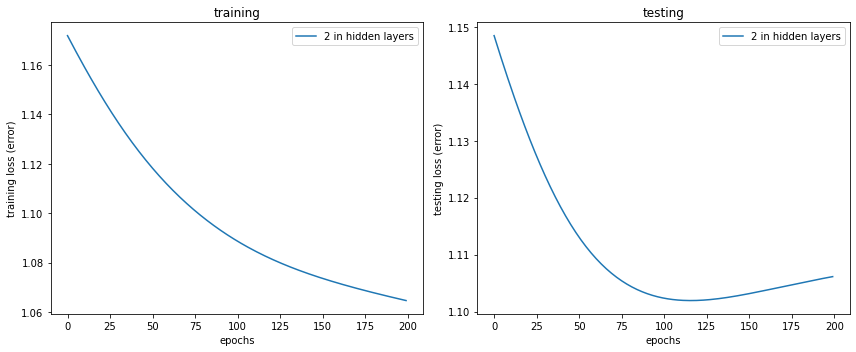

for 2 neurons in each hidden layer, minimum testing error is: 1.1019505262374878


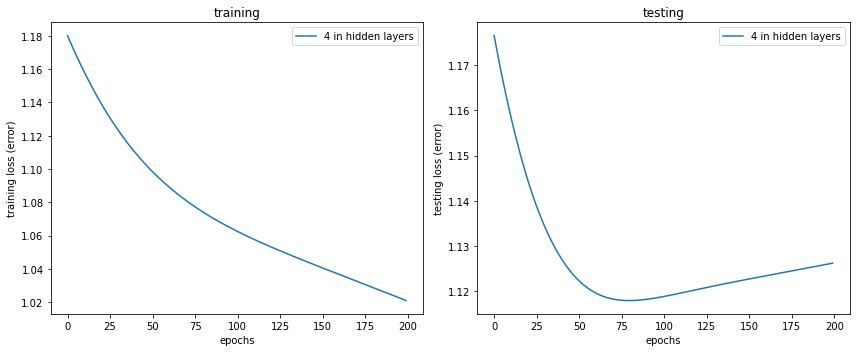

for 4 neurons in each hidden layer, minimum testing error is: 1.1179472208023071


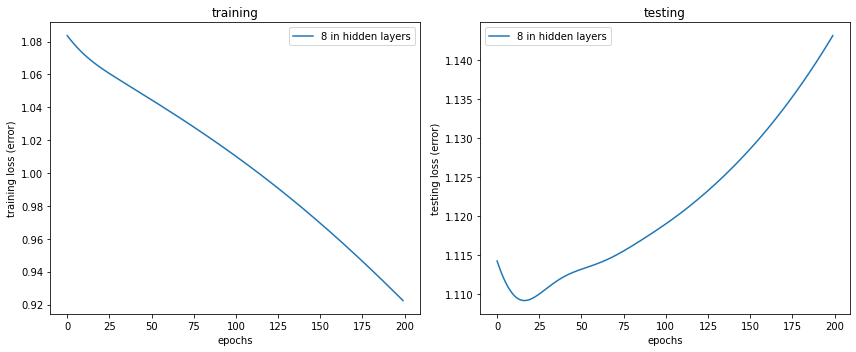

for 8 neurons in each hidden layer, minimum testing error is: 1.1091861724853516


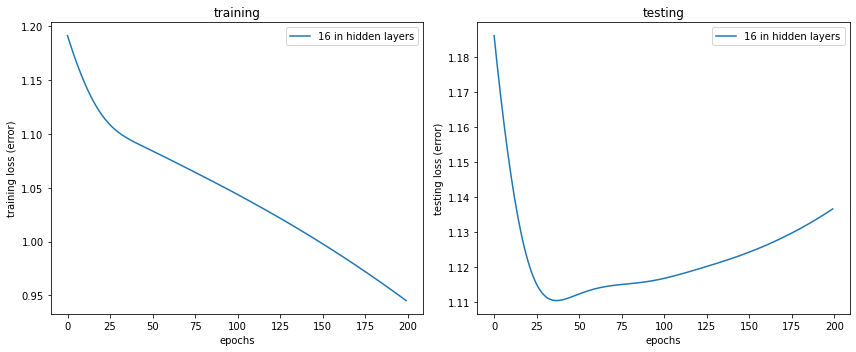

for 16 neurons in each hidden layer, minimum testing error is: 1.1104787588119507


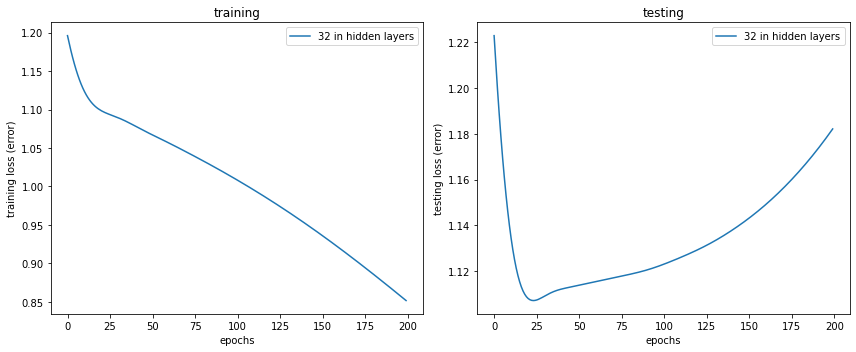

for 32 neurons in each hidden layer, minimum testing error is: 1.107163667678833


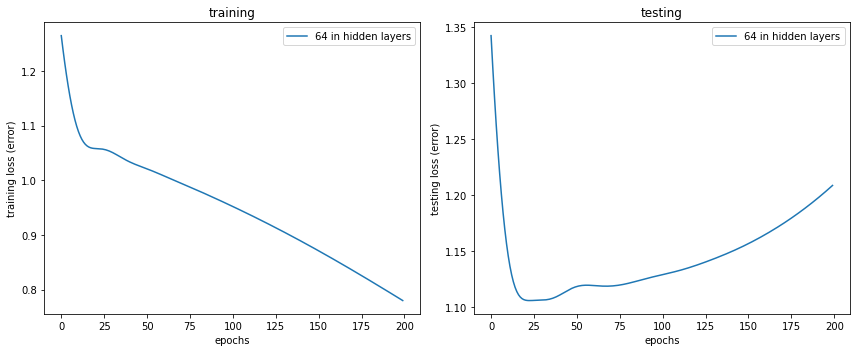

for 64 neurons in each hidden layer, minimum testing error is: 1.1061954498291016


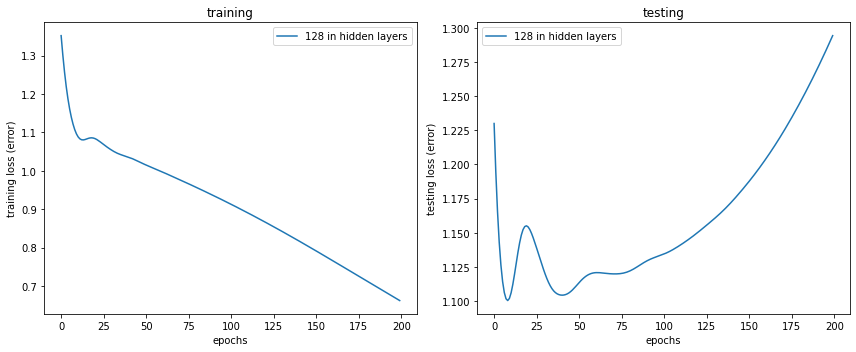

for 128 neurons in each hidden layer, minimum testing error is: 1.1003466844558716


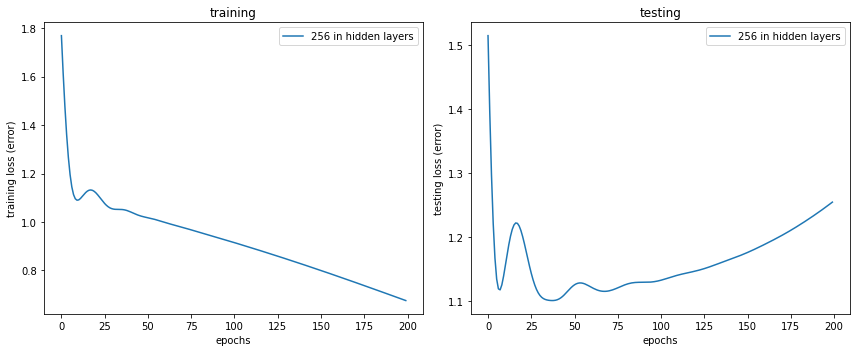

for 256 neurons in each hidden layer, minimum testing error is: 1.1008434295654297


In [13]:
epochs=200

tf.random.set_seed(5)

# 2 layer network with varying neuron numbers in hidden layer
num_of_neurons = [2,4,8,16,32,64,128,256]
#num_of_neurons = [2,4,8,16,32]

for neurons in num_of_neurons:
    
    plt.figure(figsize=(12,5))
    plt.subplot(1, 2, 1)
    plt.ylabel('training loss (error)')
    plt.title('training')
    plt.xlabel('epochs')

    plt.subplot(1, 2, 2)
    plt.ylabel('testing loss (error)')
    plt.title('testing')
    plt.xlabel('epochs')
    
    testing_errors = np.zeros((epochs))
    training_errors = np.zeros((epochs))
        
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(neurons, activation='sigmoid', input_dim=13), 
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    model.fit(X_train, y_train, epochs=epochs, batch_size=len(X_train), validation_data = (X_test, y_test), verbose=0)
        

    plt.subplot(1, 2, 1)
    plt.plot(model.history.history['loss'], label=f'{neurons} in hidden layers')
    #plt.plot(np.arange(1,epochs+1,1), training_errors, label=f'{neurons} in hidden layers')


    plt.subplot(1, 2, 2)
    plt.plot(model.history.history['val_loss'], label=f'{neurons} in hidden layers')
    #plt.plot(np.arange(1,epochs+1,1), testing_errors, label=f'{neurons} in hidden layers')
    
    plt.subplot(1, 2, 1)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    #print(f'for {neurons} neurons in each hidden layer, minimum testing error is: {np.min(testing_errors)}')  
    print(f"for {neurons} neurons in each hidden layer, minimum testing error is: {np.min(model.history.history['val_loss'])}")  

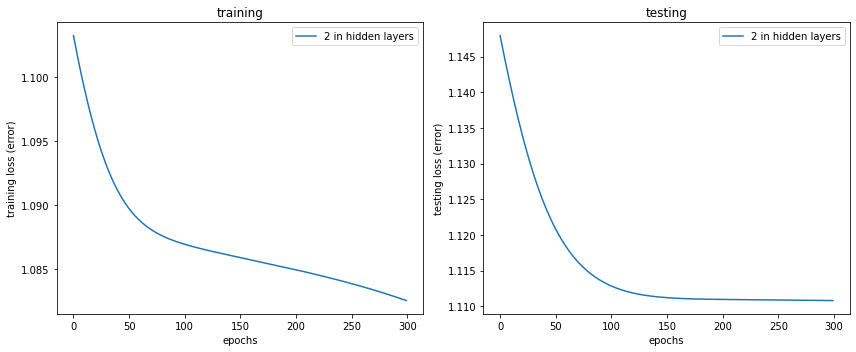

for 2 neurons in each hidden layer, minimum testing error is: 1.110785722732544


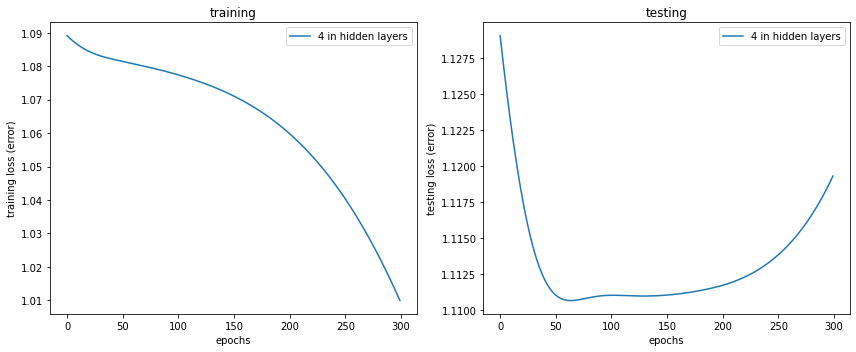

for 4 neurons in each hidden layer, minimum testing error is: 1.1106560230255127


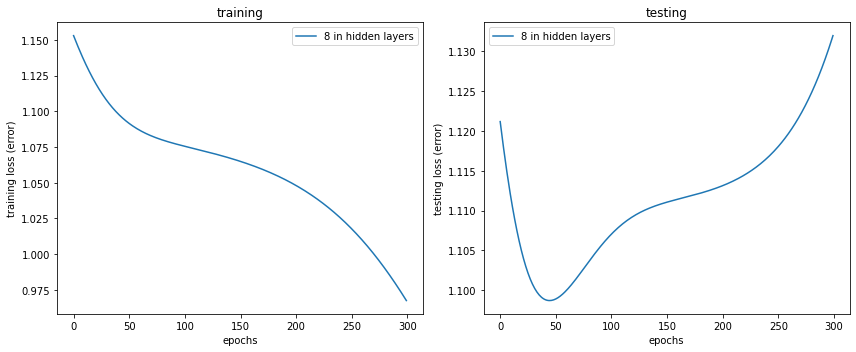

for 8 neurons in each hidden layer, minimum testing error is: 1.0987203121185303


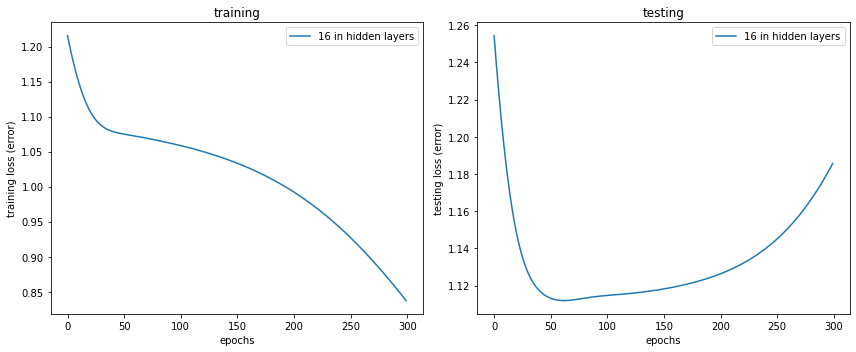

for 16 neurons in each hidden layer, minimum testing error is: 1.1119787693023682


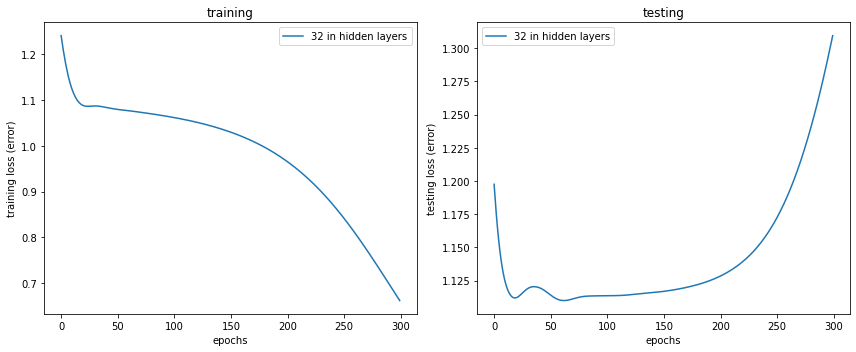

for 32 neurons in each hidden layer, minimum testing error is: 1.110031008720398


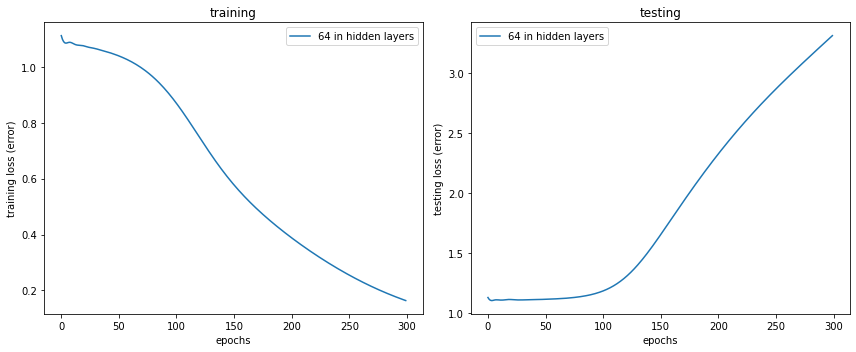

for 64 neurons in each hidden layer, minimum testing error is: 1.1071101427078247


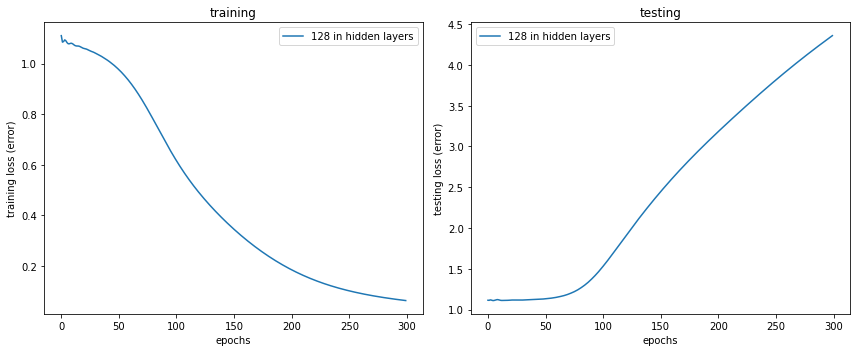

for 128 neurons in each hidden layer, minimum testing error is: 1.1100547313690186


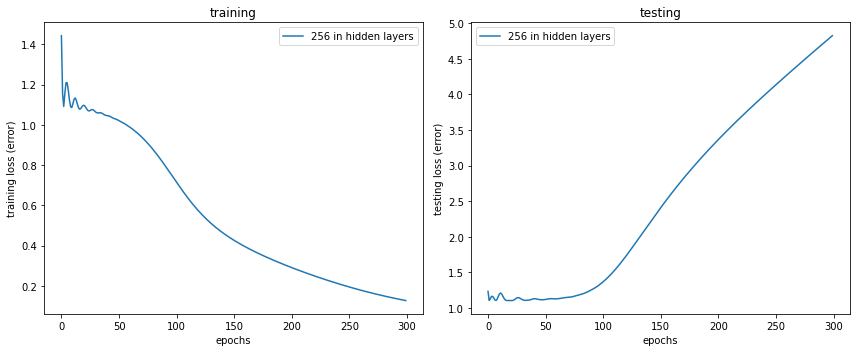

for 256 neurons in each hidden layer, minimum testing error is: 1.1030958890914917


In [14]:
epochs=300
tf.random.set_seed(5)

#3 layer network with varying neuron numbers in hidden layer
num_of_neurons = [2,4,8,16,32,64,128,256]
#num_of_neurons = [2,4,8,16,32]

for neurons in num_of_neurons:
    
    plt.figure(figsize=(12,5))
    plt.subplot(1, 2, 1)
    plt.ylabel('training loss (error)')
    plt.title('training')
    plt.xlabel('epochs')

    plt.subplot(1, 2, 2)
    plt.ylabel('testing loss (error)')
    plt.title('testing')
    plt.xlabel('epochs')
    
    testing_errors = np.zeros((epochs))
    training_errors = np.zeros((epochs))
        
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(neurons, activation='sigmoid', input_dim=13), 
        tf.keras.layers.Dense(neurons, activation='sigmoid'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    model.fit(X_train, y_train, batch_size=len(X_train), epochs=epochs, validation_data = (X_test, y_test), verbose=0)
        

    plt.subplot(1, 2, 1)
    plt.plot(model.history.history['loss'], label=f'{neurons} in hidden layers')
    #plt.plot(np.arange(1,epochs+1,1), training_errors, label=f'{neurons} in hidden layers')


    plt.subplot(1, 2, 2)
    plt.plot(model.history.history['val_loss'], label=f'{neurons} in hidden layers')
    #plt.plot(np.arange(1,epochs+1,1), testing_errors, label=f'{neurons} in hidden layers')
    
    plt.subplot(1, 2, 1)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    #print(f'for {neurons} neurons in each hidden layer, minimum testing error is: {np.min(testing_errors)}')  
    print(f"for {neurons} neurons in each hidden layer, minimum testing error is: {np.min(model.history.history['val_loss'])}")  

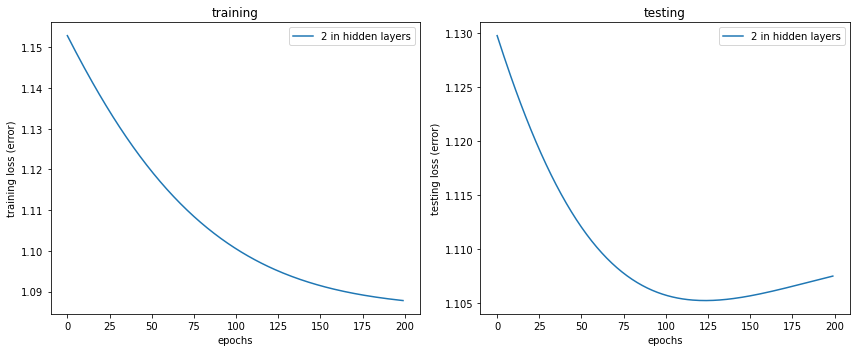

for 2 neurons in each hidden layer, minimum testing error is: 1.1052577495574951


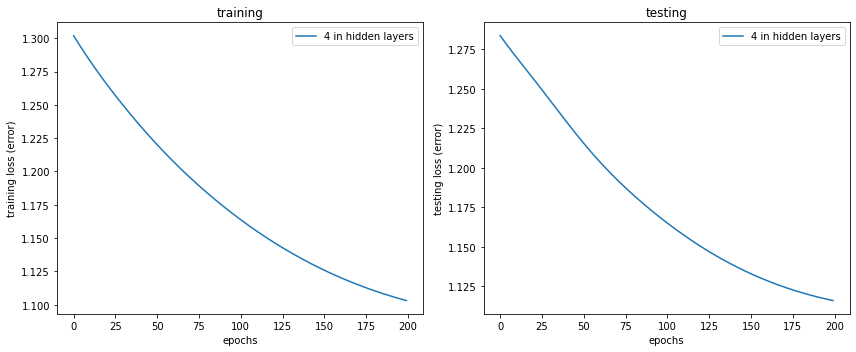

for 4 neurons in each hidden layer, minimum testing error is: 1.1160273551940918


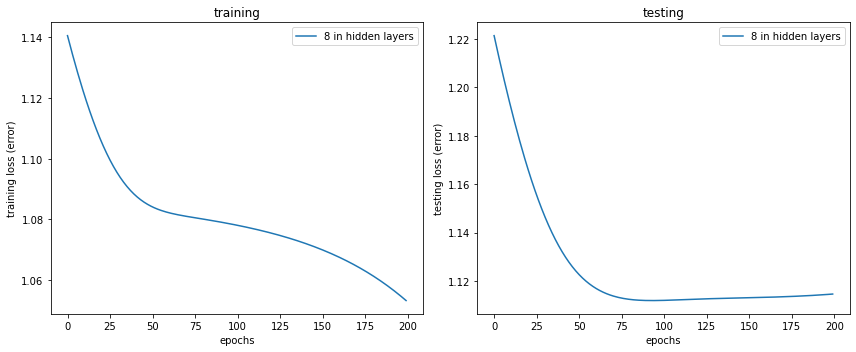

for 8 neurons in each hidden layer, minimum testing error is: 1.1119409799575806


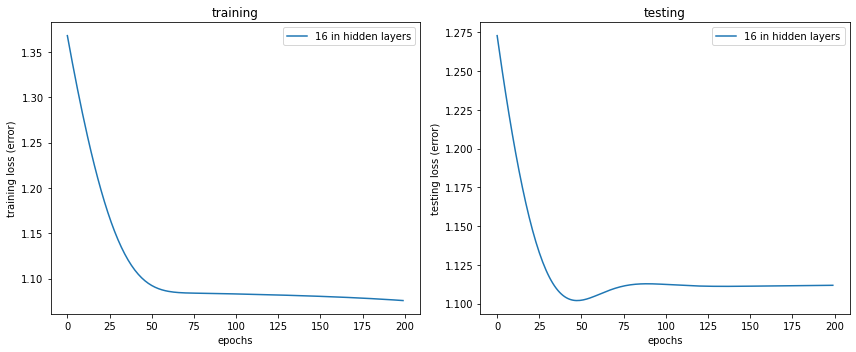

for 16 neurons in each hidden layer, minimum testing error is: 1.1020257472991943


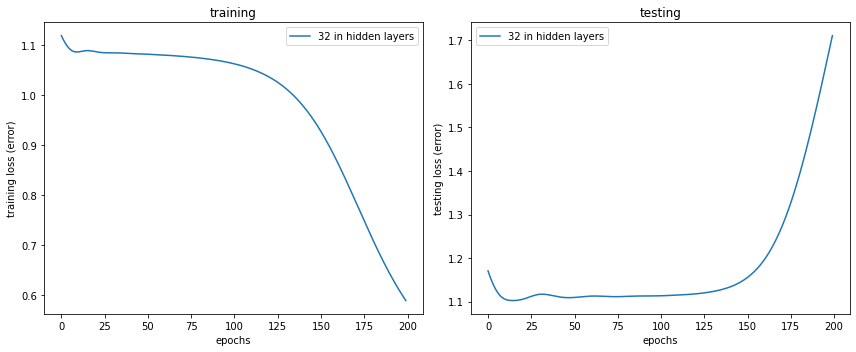

for 32 neurons in each hidden layer, minimum testing error is: 1.1024588346481323


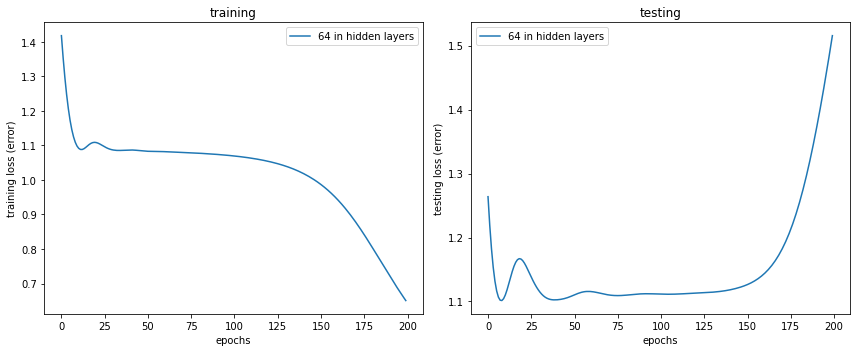

for 64 neurons in each hidden layer, minimum testing error is: 1.1014726161956787


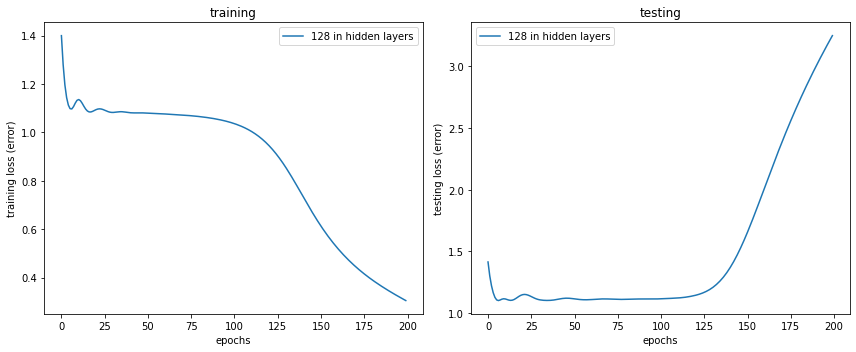

for 128 neurons in each hidden layer, minimum testing error is: 1.1007148027420044


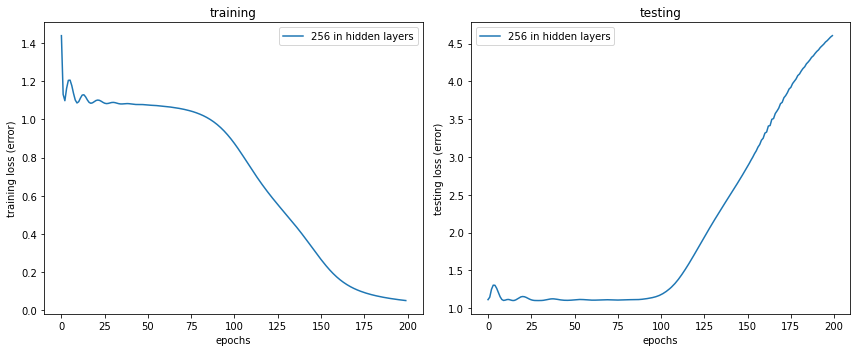

for 256 neurons in each hidden layer, minimum testing error is: 1.102047324180603


In [15]:
epochs=200
tf.random.set_seed(5)

#3 layer network with varying neuron numbers in hidden layer
num_of_neurons = [2,4,8,16,32,64,128,256]
#num_of_neurons = [2,4,8,16,32]

for neurons in num_of_neurons:
    
    plt.figure(figsize=(12,5))
    plt.subplot(1, 2, 1)
    plt.ylabel('training loss (error)')
    plt.title('training')
    plt.xlabel('epochs')

    plt.subplot(1, 2, 2)
    plt.ylabel('testing loss (error)')
    plt.title('testing')
    plt.xlabel('epochs')
    
    testing_errors = np.zeros((epochs))
    training_errors = np.zeros((epochs))
        
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(neurons, activation='sigmoid', input_dim=13), 
        tf.keras.layers.Dense(neurons, activation='sigmoid'),
        tf.keras.layers.Dense(neurons, activation='sigmoid'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    model.fit(X_train, y_train, epochs=epochs, batch_size=len(X_train), validation_data = (X_test, y_test), verbose=0)
        

    plt.subplot(1, 2, 1)
    plt.plot(model.history.history['loss'], label=f'{neurons} in hidden layers')
    #plt.plot(np.arange(1,epochs+1,1), training_errors, label=f'{neurons} in hidden layers')


    plt.subplot(1, 2, 2)
    plt.plot(model.history.history['val_loss'], label=f'{neurons} in hidden layers')
    #plt.plot(np.arange(1,epochs+1,1), testing_errors, label=f'{neurons} in hidden layers')
    
    plt.subplot(1, 2, 1)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    #print(f'for {neurons} neurons in each hidden layer, minimum testing error is: {np.min(testing_errors)}')  
    print(f"for {neurons} neurons in each hidden layer, minimum testing error is: {np.min(model.history.history['val_loss'])}")  

# Question 4b

In [16]:
epochs=51
tf.random.set_seed(5)

#2 layer network with varying neuron numbers in hidden layer
  
testing_errors = np.zeros((epochs))
training_errors = np.zeros((epochs))

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation='sigmoid', input_dim=13), 
    tf.keras.layers.Dense(4, activation='sigmoid'), 
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=epochs, verbose=0)

In [17]:
x1 = np.array((13.72, 1.43, 2.5, 16.7, 108, 3.4, 3.67, 0.19, 2.04, 6.8, 0.89, 2.87, 1285))/max_values
x1 = np.array(x1).reshape(1,13)
x2 = np.array((12.04, 4.3, 2.38, 22, 80, 2.1, 1.75, 0.42, 1.35, 2.6, 0.79, 2.57, 580))/max_values
x2 = np.array(x2).reshape(1,13)
x3 = np.array((14.13, 4.1, 2.74, 24.5, 96, 2.05, 0.76, 0.56, 1.35, 9.2, 0.61, 1.6, 560))/max_values
x3 = np.array(x3).reshape(1,13)

predict_x=model.predict(x1) 
y1=int(np.argmax(predict_x)+1)
print(f"predicted output for x1 is {output[y1]}")
predict_x=model.predict(x2) 
y2=int(np.argmax(predict_x)+1)
print(f"predicted output for x2 is {output[y2]}")
predict_x=model.predict(x3) 
y3=int(np.argmax(predict_x)+1)
print(f"predicted output for x3 is {output[y3]}")

predicted output for x1 is Product 2
predicted output for x2 is Product 2
predicted output for x3 is Product 1
